

---


# **Projeto Cyclistic**

---

Introdução Esse notebook é um projeto de conclusão de curso da Certificação Profissional de Análise de Dados do Google.

Este projeto de análise dos dados de viagens da Cyclistic, uma empresa de compartilhamento de bicicletas, com o objetivo de entender as diferenças no comportamento entre membros anuais e ciclistas casuais. A análise se concentra em identificar padrões de uso, como duração das viagens, horários e dias da semana preferidos, e tipo de bicicleta utilizada. As informações obtidas serão utilizadas para responder às seguintes perguntas:

1 - Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?

2 - Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?

3 - Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

Para guiar a análise dos dados, seguirei as seis etapas de análise de dados preconizadas pelo Google: perguntar, preparar, processar, analisar, compartilhar e agir.

# **Etapa 1 - Perguntar (Entender o problema)**
Problema a ser resolvido - como tranformar usuarios casuais em membros.


# **Etapa 2 - Preparando os dados.**

Fonte dos dados: https://divvy-tripdata.s3.amazonaws.com/index.html

Os dados estão divididos em 12 arquivos, cada um referente a um mês do ano (jan/22 a dez/22).

Os arquivos possuem a extensão .csv e representam os registros de viagem utilizando as bicicletas da empresa.

Ferramenta utilizada foi google colab junto com pacote Pandas, Matplotlib e Seaborn.

## 1.1 Importando base de dados

In [1]:
# Importando os drive da nuvem
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Importando os pacotes utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando base de dados
jan = pd.read_csv('dados_jan22.csv')
fev = pd.read_csv('dados_fev22.csv')
mar = pd.read_csv('dados_mar22.csv')
abr = pd.read_csv('dados_abr22.csv')
mai = pd.read_csv('dados_mai22.csv')
jun = pd.read_csv('dados_jun22.csv')
jul = pd.read_csv('dados_jul22.csv')
ago = pd.read_csv('dados_ago22.csv')
set = pd.read_csv('dados_set22.csv')
out = pd.read_csv('dados_out22.csv')
nov = pd.read_csv('dados_nov22.csv')
dez = pd.read_csv('dados_dez22.csv')

In [4]:
# Verificando alguns dados
nov.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member


In [5]:
ago.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


## 1.2 Concatenando base de dados

In [6]:
# unindo os df dos meses em um unico df
df = pd.concat([jan, fev, mar, abr, mai, jun, jul, ago, set, out, nov, dez], axis=0, ignore_index=True)


## 1.3 Inspeção basica dos dados

In [7]:
df.shape

(5667717, 13)

In [8]:
# Exibindo as primeiras linhas do df
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [9]:
# Mostrando os tipos de dados do df
df.dtypes

,0
ride_id,object
rideable_type,object
started_at,object
ended_at,object
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


Obs: colunas started_at e ended_at necessitam ser transformadas para uma coluna dia / mes / ano e horas

In [10]:
# Informacoes gerais do df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB
None


# **Etapa 3 - Processando os dados**

Essa etapa foca na limpeza e tratamento dos dados.

In [11]:
# Verificando se a valores nulos
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64


In [12]:
# Valores Nulos
val_nulo = pd.DataFrame({'Valores_Nulos': df.isnull().sum(),
                         '%':(df.isnull().sum() / len(df)*100).round(2)})
val_nulo

,Valores_Nulos,%
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00
start_station_name,833064,14.70
start_station_id,833064,14.70
end_station_name,892742,15.75
end_station_id,892742,15.75
start_lat,0,0.00
start_lng,0,0.00


Obs2: Ficou decidido que como os valores nulos representam em media menos que 16% dos valores de cada coluna, os valores nulos serão excluidos da analise.

In [13]:
# Removendo valores nulos
df_limpo = df.dropna()

In [14]:
# Verificando se os valores nulos foram excluidos
df_limpo.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [15]:
# verificando se a valores ausentes
df_limpo.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [16]:
# verificando o tamanho do dataframe apos limpeza
df_limpo.shape

(4369360, 13)

# **Etapa 3.1 - Tratamento dos dados**

In [17]:
# Renomeando as colunas do df
df_limpo.columns = ['id_viagem', 'tipo_bicicleta', 'inicio_viagem', 'fim_viagem', 'estacao_inicio_nome',
                 'estacao_inicio_id', 'estacao_fim_nome', 'estacao_fim_id', 'inicio_lat', 'inicio_long',
                 'fim_lat', 'fim_long', 'tipo_usuario']

In [18]:
# Verificando se colunas foram alteradas de forma correta
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_viagem            object 
 1   tipo_bicicleta       object 
 2   inicio_viagem        object 
 3   fim_viagem           object 
 4   estacao_inicio_nome  object 
 5   estacao_inicio_id    object 
 6   estacao_fim_nome     object 
 7   estacao_fim_id       object 
 8   inicio_lat           float64
 9   inicio_long          float64
 10  fim_lat              float64
 11  fim_long             float64
 12  tipo_usuario         object 
dtypes: float64(4), object(9)
memory usage: 466.7+ MB


Obs: como foi visto anteriormente devemos transformar as colunas "Inicio viagem" e "Fim viagem" para conseguirmos separar todas as informacoes das colunas

In [19]:
# passo 1 alterando o tipo da coluna de objeto para datetime
df_limpo['inicio_viagem'] = pd.to_datetime(df_limpo['inicio_viagem'])
df_limpo['fim_viagem'] = pd.to_datetime(df_limpo['fim_viagem'])
df_limpo.info() # verificando se alteracao funcionou

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id_viagem            object        
 1   tipo_bicicleta       object        
 2   inicio_viagem        datetime64[ns]
 3   fim_viagem           datetime64[ns]
 4   estacao_inicio_nome  object        
 5   estacao_inicio_id    object        
 6   estacao_fim_nome     object        
 7   estacao_fim_id       object        
 8   inicio_lat           float64       
 9   inicio_long          float64       
 10  fim_lat              float64       
 11  fim_long             float64       
 12  tipo_usuario         object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 466.7+ MB


/tmp/ipython-input-2829692501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['inicio_viagem'] = pd.to_datetime(df_limpo['inicio_viagem'])
/tmp/ipython-input-2829692501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['fim_viagem'] = pd.to_datetime(df_limpo['fim_viagem'])


In [20]:
# Passo 2 destrinchando as "inicio_viagem" e "fim_viagem" em outras 4 colunas "dia_semana", "mes", "hora_saida" e "duracao_viagem"
df_limpo['dia_semana'] = df_limpo['inicio_viagem'].dt.day_name()
df_limpo['mes'] = df_limpo['inicio_viagem'].dt.month_name()
df_limpo['hora_saida'] = df_limpo['inicio_viagem'].dt.hour
df_limpo['duracao_viagem'] = (df_limpo['fim_viagem'] - df_limpo['inicio_viagem']).dt.total_seconds() / 60

/tmp/ipython-input-1654784759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['dia_semana'] = df_limpo['inicio_viagem'].dt.day_name()
/tmp/ipython-input-1654784759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['mes'] = df_limpo['inicio_viagem'].dt.month_name()
/tmp/ipython-input-1654784759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [21]:
# verificando se as colunas foram criadas
df_limpo.head()

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,inicio_lat,inicio_long,fim_lat,fim_long,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,Thursday,January,11,2.950000
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,Monday,January,8,4.350000
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,Tuesday,January,4,4.350000
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,Tuesday,January,0,14.933333
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,Thursday,January,1,6.033333


In [22]:
# arredondando o resultado da coluna duracao viagem
df_limpo['duracao_viagem'] = df_limpo['duracao_viagem'].round(2)
df_limpo.head()

/tmp/ipython-input-2192662414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['duracao_viagem'] = df_limpo['duracao_viagem'].round(2)


,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,inicio_lat,inicio_long,fim_lat,fim_long,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,Thursday,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,Monday,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,Tuesday,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,Tuesday,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,Thursday,January,1,6.03


In [23]:
# alterar o nome da coluna duracao_viagem para duracao_viagem(min)

df_limpo = df_limpo.rename(columns={'duracao_viagem': 'duracao_viagem(min)'})


In [24]:
df_limpo.head()

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,inicio_lat,inicio_long,fim_lat,fim_long,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min)
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,Thursday,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,Monday,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,Tuesday,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,Tuesday,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,Thursday,January,1,6.03


In [25]:
# Verificando novamente se os types das novas colunas estao de acordo
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id_viagem            object        
 1   tipo_bicicleta       object        
 2   inicio_viagem        datetime64[ns]
 3   fim_viagem           datetime64[ns]
 4   estacao_inicio_nome  object        
 5   estacao_inicio_id    object        
 6   estacao_fim_nome     object        
 7   estacao_fim_id       object        
 8   inicio_lat           float64       
 9   inicio_long          float64       
 10  fim_lat              float64       
 11  fim_long             float64       
 12  tipo_usuario         object        
 13  dia_semana           object        
 14  mes                  object        
 15  hora_saida           int32         
 16  duracao_viagem(min)  float64       
dtypes: datetime64[ns](2), float64(5), int32(1), object(9)
memory usage: 583.4+ MB


obs: Removendo dados que não terão utilidade:
Vou fazer uma nova limpeza nos dados, agora eliminando dados que não sejam úteis na análise. No caso optei por remover na coluna duracao_viagem quando esta for menor que zero ou vazia.

In [26]:
# verificando se ha valores vazios na coluna duracao_viagem
v_vazio = df_limpo['duracao_viagem(min)'].isnull().sum()
v_vazio_percent = df_limpo['duracao_viagem(min)'].isnull().sum() / len(df_limpo) * 100
print(f'Quantidade de valores vazios: {v_vazio}')
print(f'Percentual de valores vazios: {v_vazio_percent:.2f}%')


Quantidade de valores vazios: 0
Percentual de valores vazios: 0.00%


In [27]:
# contando valores iguais a 0 na coluna duracao_viagem
v_zero = (df_limpo['duracao_viagem(min)'] <= 0).sum()
v_zero_percent = (df_limpo['duracao_viagem(min)'] == 0).sum() / len(df_limpo) * 100
print(f'Quantidade de valores menor iguais a zero: {v_zero}')
print(f'Percentual de valores menor iguais a zero: {v_zero_percent:.2f}%')
#

Quantidade de valores menor iguais a zero: 308
Percentual de valores menor iguais a zero: 0.01%


In [28]:
# removendo valores menor igual a zero da coluna duracao_viagem
df_limpo = df_limpo[df_limpo['duracao_viagem(min)'] > 0]

In [29]:
df_limpo.shape

(4369052, 17)

In [30]:
# tambem iremos remover as colunas de lat e long
df_limpo = df_limpo.drop(columns=['inicio_lat', 'inicio_long', 'fim_lat', 'fim_long'])
df_limpo.head()

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min)
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Thursday,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Monday,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,Tuesday,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,Tuesday,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,Thursday,January,1,6.03


In [31]:
# salvando o arquivo limpo para relatorio no powerBi
df_limpo.to_csv('dados_limpos_analise2.csv', index=False)

# **Etapa 4 - Analise exploratoria de dados**

In [32]:
# analise coluna tipo_bicicleta
tb = df_limpo['tipo_bicicleta'].value_counts()
tb_porcentagem = (df_limpo['tipo_bicicleta'].value_counts(normalize=True) * 100) .round(2)
resultado = pd.DataFrame({'Quantidade': tb, '%': tb_porcentagem.round(2)})
resultado


,Quantidade,%
tipo_bicicleta,,
classic_bike,2597301,59.45
electric_bike,1596899,36.55
docked_bike,174852,4.00


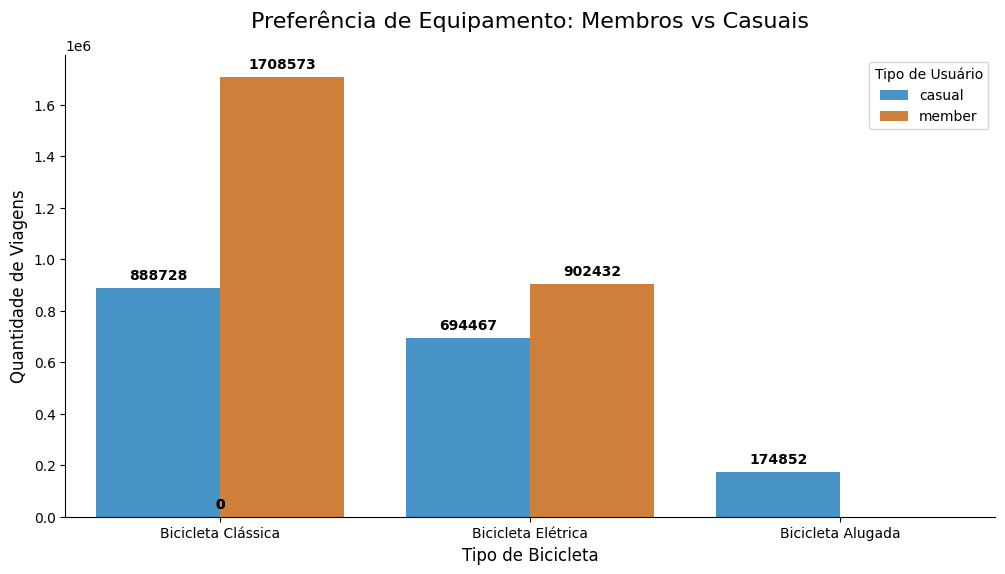

In [33]:
# 1. Preparação dos dados (Tradução e Agrupamento)
mapeamento = {
    'classic_bike': 'Bicicleta Clássica',
    'electric_bike': 'Bicicleta Elétrica',
    'docked_bike': 'Bicicleta Alugada'
}

df_limpo['tipo_bicicleta'] = df_limpo['tipo_bicicleta'].map(mapeamento)

# 2. Criando o gráfico de comparação
plt.figure(figsize=(12, 6))

# Usamos o 'hue' para separar Membros de Casuais nas barras
ax = sns.countplot(data=df_limpo, x='tipo_bicicleta', hue='tipo_usuario',
                   palette=['#3498db', '#e67e22'], order=df_limpo['tipo_bicicleta'].value_counts().index)

# 3. Estilização Profissional
plt.title('Preferência de Equipamento: Membros vs Casuais', fontsize=16, pad=20)
plt.xlabel('Tipo de Bicicleta', fontsize=12)
plt.ylabel('Quantidade de Viagens', fontsize=12)
plt.legend(title='Tipo de Usuário')

# Adicionando rótulos de dados nas barras para facilitar a leitura
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

sns.despine() # Remove as bordas desnecessárias do gráfico
plt.show()



/tmp/ipython-input-1765034482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpo, x='tipo_bicicleta', palette='viridis')


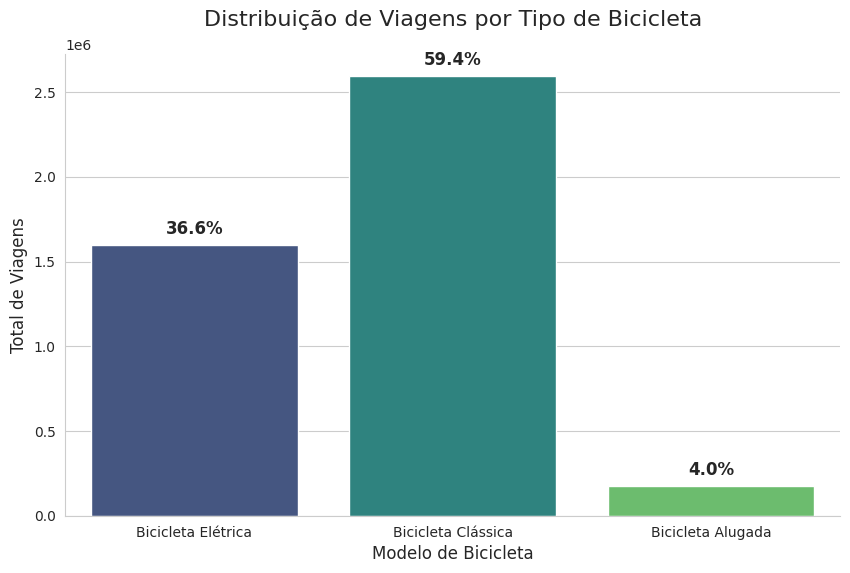

In [34]:
# 1. Definimos o tamanho da figura e o estilo
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 2. Criamos o gráfico e guardamos em uma variável 'ax'
ax = sns.countplot(data=df_limpo, x='tipo_bicicleta', palette='viridis')

# 3. Calculamos o total de viagens para achar a porcentagem
total = len(df_limpo['tipo_bicicleta'])

# 4. Adicionamos a porcentagem em cima de cada barra
for p in ax.patches:
    # Calculamos a porcentagem
    porcentagem = f'{100 * p.get_height() / total:.1f}%'

    # Definimos a posição do texto (x, y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Adicionamos o texto no gráfico
    ax.annotate(porcentagem, (x, y),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# 5. Títulos e rótulos profissionais
plt.title('Distribuição de Viagens por Tipo de Bicicleta', fontsize=16, pad=20)
plt.xlabel('Modelo de Bicicleta', fontsize=12)
plt.ylabel('Total de Viagens', fontsize=12)

# Limpando as bordas para um visual mais "clean"
sns.despine()

plt.show()

Analise: mais de 59% dos usuarios utilizam bicicletas comuns em seus trejetos

In [35]:
# analise da coluna estacao_inicio
estacao_inicio = df_limpo['estacao_inicio_nome'].value_counts()
estacao_inicio_porcentagem = (df_limpo['estacao_inicio_nome'].value_counts(normalize=True) * 100) .round(2)
resultado_inicio = pd.DataFrame({'Quantidade': estacao_inicio, '%': estacao_inicio_porcentagem.round(2)})
resultado_inicio.head(5)

,Quantidade,%
estacao_inicio_nome,,
Streeter Dr & Grand Ave,71259,1.63
DuSable Lake Shore Dr & Monroe St,39250,0.90
DuSable Lake Shore Dr & North Blvd,37696,0.86
Michigan Ave & Oak St,37204,0.85
Wells St & Concord Ln,34507,0.79


In [36]:
# analise da coluna estacao_fim
estacao_fim = df_limpo['estacao_fim_nome'].value_counts()
estacao_fim_porcentagem = (df_limpo['estacao_fim_nome'].value_counts(normalize=True) * 100) .round(2)
resultado_fim = pd.DataFrame({'Quantidade': estacao_fim, '%': estacao_fim_porcentagem.round(2)})
resultado_fim.head(5)

,Quantidade,%
estacao_fim_nome,,
Streeter Dr & Grand Ave,72530,1.66
DuSable Lake Shore Dr & North Blvd,40561,0.93
DuSable Lake Shore Dr & Monroe St,38499,0.88
Michigan Ave & Oak St,38275,0.88
Wells St & Concord Ln,34687,0.79


In [37]:
# Analise coluna tipo usuario
tipo_usuario = df_limpo['tipo_usuario'].value_counts()
tipo_usuario_percent  = (df_limpo['tipo_usuario'].value_counts(normalize=True) * 100) .round(2)
resultado_tipo_usuario = pd.DataFrame({'Quantidade': tipo_usuario, '%': tipo_usuario_percent.round(2)})
resultado_tipo_usuario

,Quantidade,%
tipo_usuario,,
member,2611005,59.76
casual,1758047,40.24


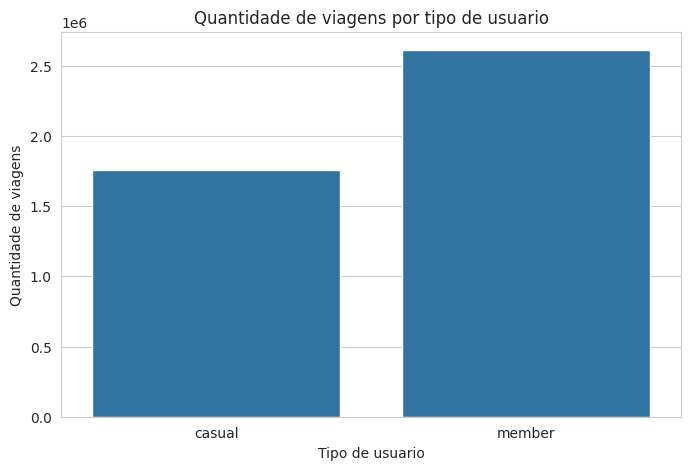

In [38]:
# Visualizacao grafica da coluna tipo_usuario
plt.figure(figsize=(8, 5))
sns.countplot(data=df_limpo, x='tipo_usuario')
plt.title('Quantidade de viagens por tipo de usuario')
plt.xlabel('Tipo de usuario')
plt.ylabel('Quantidade de viagens')
plt.show()

/tmp/ipython-input-2430642654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpo, x='tipo_usuario', palette=['#3498db', '#e67e22'])


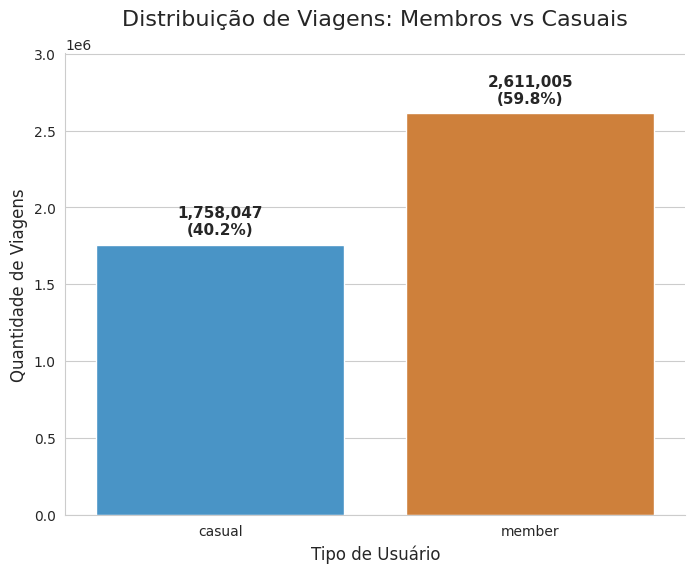

In [39]:
# 1. Configuração do gráfico
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# 2. Criação do gráfico (ajuste o nome da coluna se necessário, ex: 'member_casual')
ax = sns.countplot(data=df_limpo, x='tipo_usuario', palette=['#3498db', '#e67e22'])

# 3. Cálculo do total para as porcentagens
total = len(df_limpo['tipo_usuario'])

# 4. Adicionando os rótulos de Quantidade e Porcentagem
for p in ax.patches:
    # Cálculo da porcentagem
    porcentagem = f'{100 * p.get_height() / total:.1f}%'
    # Valor absoluto (quantidade)
    quantidade = f'{int(p.get_height()):,}'

    # Texto final que aparecerá no gráfico
    texto = f'{quantidade}\n({porcentagem})'

    # Posição do texto
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Adicionando a anotação
    ax.annotate(texto, (x, y),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# 5. Títulos e Ajustes Finais
plt.title('Distribuição de Viagens: Membros vs Casuais', fontsize=16, pad=20)
plt.xlabel('Tipo de Usuário', fontsize=12)
plt.ylabel('Quantidade de Viagens', fontsize=12)

# Aumentar o limite do eixo Y para o texto não ficar cortado
plt.ylim(0, df_limpo['tipo_usuario'].value_counts().max() * 1.15)

sns.despine()
plt.show()

Podemos observar que a base de usuários é composta por 59% de membros, que garantem a receita recorrente, enquanto mais de 40% são casuais, representando nossa maior oportunidade de expansão de assinaturas.

In [40]:
# Analise coluna dia da semana
dia_semana = df_limpo['dia_semana'].value_counts()
dia_semana_percent  = (df_limpo['dia_semana'].value_counts(normalize=True) * 100) .round(2)
resultado_dia_semana = pd.DataFrame({'Quantidade': dia_semana, '%': dia_semana_percent.round(2)})
resultado_dia_semana

,Quantidade,%
dia_semana,,
Saturday,705565,16.15
Thursday,645855,14.78
Wednesday,616343,14.11
Friday,608814,13.93
Tuesday,607593,13.91
Sunday,598985,13.71
Monday,585897,13.41


In [41]:
# Analise coluna dia da semana
# 1. Criando um dicionário para tradução
mapa_dias = {
    'Sunday': 'Domingo',
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado'
}

# 2. Criando a ordem correta que desejamos ver no relatório
ordem_dias = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira',
              'Quinta-feira', 'Sexta-feira', 'Sábado']

# 3. Traduzindo a coluna no DataFrame
df_limpo['dia_semana'] = df_limpo['dia_semana'].map(mapa_dias)

# 4. Transformando a coluna em uma categoria ordenada (isso garante a ordem correta)
df_limpo['dia_semana'] = pd.Categorical(df_limpo['dia_semana'], categories=ordem_dias, ordered=True)

# 5. Gerando a análise (agora usamos o groupby para respeitar a ordem categórica)
contagem = df_limpo['dia_semana'].value_counts(sort=False) # sort=False mantém a ordem dos dias
porcentagem = (df_limpo['dia_semana'].value_counts(normalize=True, sort=False) * 100).round(2)

# 6. Criando o DataFrame final
resultado_dia_semana = pd.DataFrame({
    'Quantidade': contagem,
    'Porcentagem (%)': porcentagem
})

print("Análise de Viagens por Dia da Semana:")
display(resultado_dia_semana)

Análise de Viagens por Dia da Semana:


,Quantidade,Porcentagem (%)
dia_semana,,
Domingo,598985,13.71
Segunda-feira,585897,13.41
Terça-feira,607593,13.91
Quarta-feira,616343,14.11
Quinta-feira,645855,14.78
Sexta-feira,608814,13.93
Sábado,705565,16.15


/tmp/ipython-input-3499225139.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpo, x='dia_semana', order=ordem_dias, palette='Blues_d')


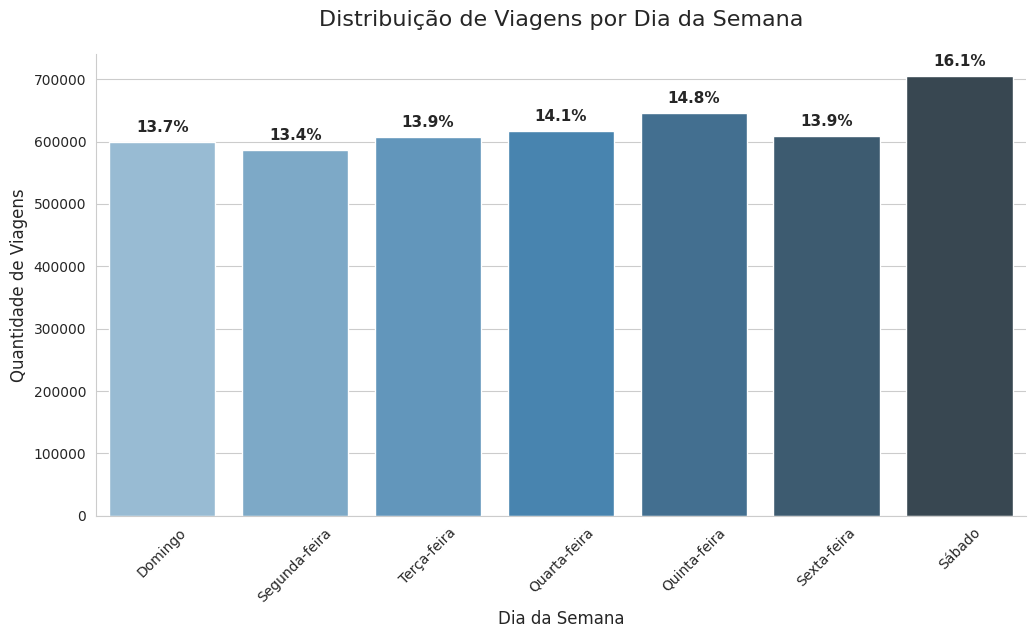

In [42]:
# 1. Definindo a ordem correta para o gráfico
ordem_dias = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira',
              'Quinta-feira', 'Sexta-feira', 'Sábado']

# 2. Configuração visual
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 3. Criando o gráfico respeitando a ordem cronológica
# O parâmetro 'order' é essencial para não ficar em ordem alfabética
ax = sns.countplot(data=df_limpo, x='dia_semana', order=ordem_dias, palette='Blues_d')

# 4. Cálculo do total para as porcentagens
total = len(df_limpo['dia_semana'])

# 5. Adicionando as porcentagens no topo das barras
for p in ax.patches:
    porcentagem = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(porcentagem, (x, y),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# 6. Títulos e rótulos
plt.title('Distribuição de Viagens por Dia da Semana', fontsize=16, pad=20)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Quantidade de Viagens', fontsize=12)

# Ajuste para os nomes não ficarem apertados
plt.xticks(rotation=45)
sns.despine()

plt.show()

Obs: Podemos ver que o dia que o servico de aluguel das biscicletas o dia mais utilizado é sabado.
Vamos analisar tipo de usuario x dia da semana

In [49]:
# Recarregando o df original limpo
df_limpo = pd.read_csv("dados_limpos_analise2.csv")
df_limpo.head()
#

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min)
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Thursday,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Monday,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,Tuesday,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,Tuesday,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,Thursday,January,1,6.03


/tmp/ipython-input-3241782006.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_dia_semana = df_limpo.groupby(['tipo_usuario', 'dia_semana']).size().reset_index(name='contagem')


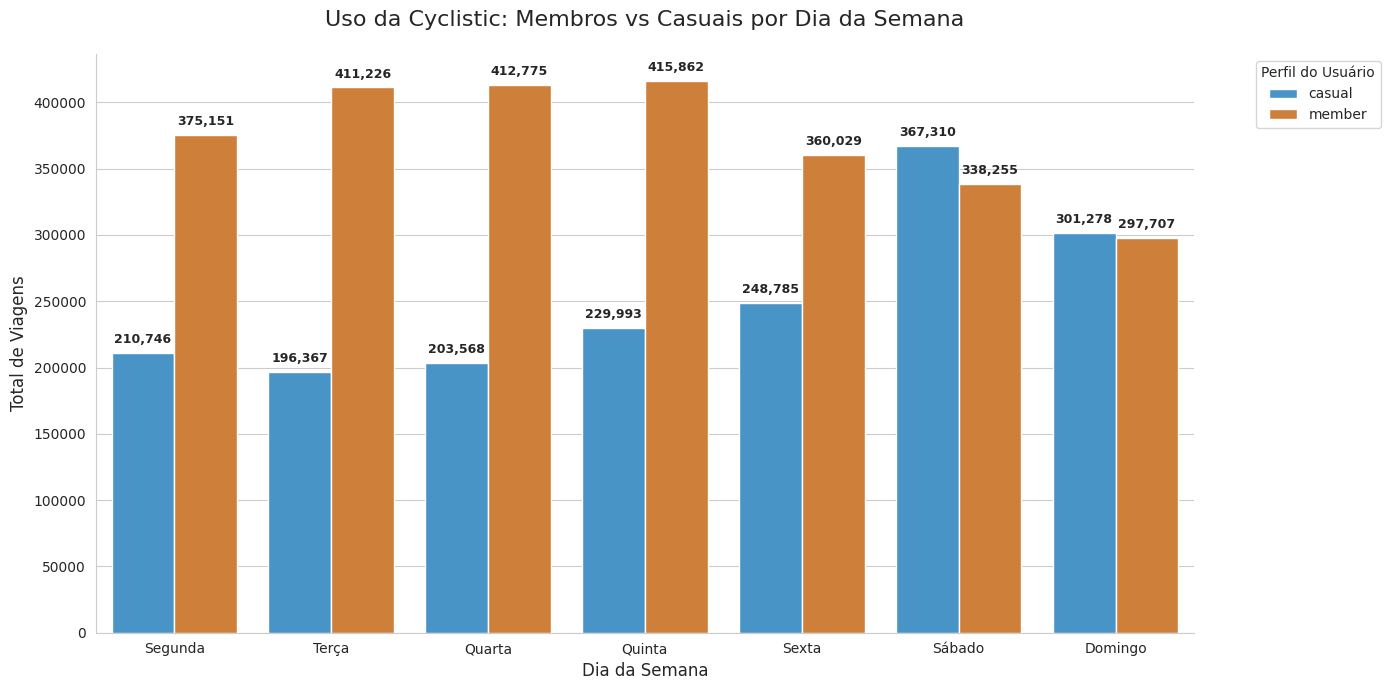

In [50]:

# Fazendo analise do tipo usuarios x dia semana
# 1. Definição da tradução e ordem
mapa_dias = {
    'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta',
    'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}
ordem_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# 2. Preparação dos dados
# Traduzimos e aplicamos a categoria ordenada
df_limpo['dia_semana'] = df_limpo['dia_semana'].map(mapa_dias)
df_limpo['dia_semana'] = pd.Categorical(df_limpo['dia_semana'], categories=ordem_pt, ordered=True)

# Agrupamento para a tabela
analise_dia_semana = df_limpo.groupby(['tipo_usuario', 'dia_semana']).size().reset_index(name='contagem')

# 3. Visualização Gráfica
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Criando o gráfico de barras agrupadas
ax = sns.barplot(data=analise_dia_semana, x='dia_semana', y='contagem', hue='tipo_usuario',
                 palette=['#3498db', '#e67e22'])

# 4. Adicionando rótulos de dados (opcional, para precisão)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height()):,}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, fontweight='bold', xytext=(0, 5),
                    textcoords='offset points')

# 5. Títulos e Legendas Profissionais
plt.title('Uso da Cyclistic: Membros vs Casuais por Dia da Semana', fontsize=16, pad=20)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Viagens', fontsize=12)
plt.legend(title='Perfil do Usuário', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()

Obs: Durante a semana em media mais de 60% dos usuarios são membros, mas ja no final de semana principalmente no sabado os principais usuarios do servico são casuais.

In [51]:
df_limpo.head()

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min)
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Quinta,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Segunda,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,Terça,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,Terça,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,Quinta,January,1,6.03


/tmp/ipython-input-404056879.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_duracao = df_limpo.groupby(['tipo_usuario', 'dia_semana'])['duracao_viagem(min)'].mean().reset_index()


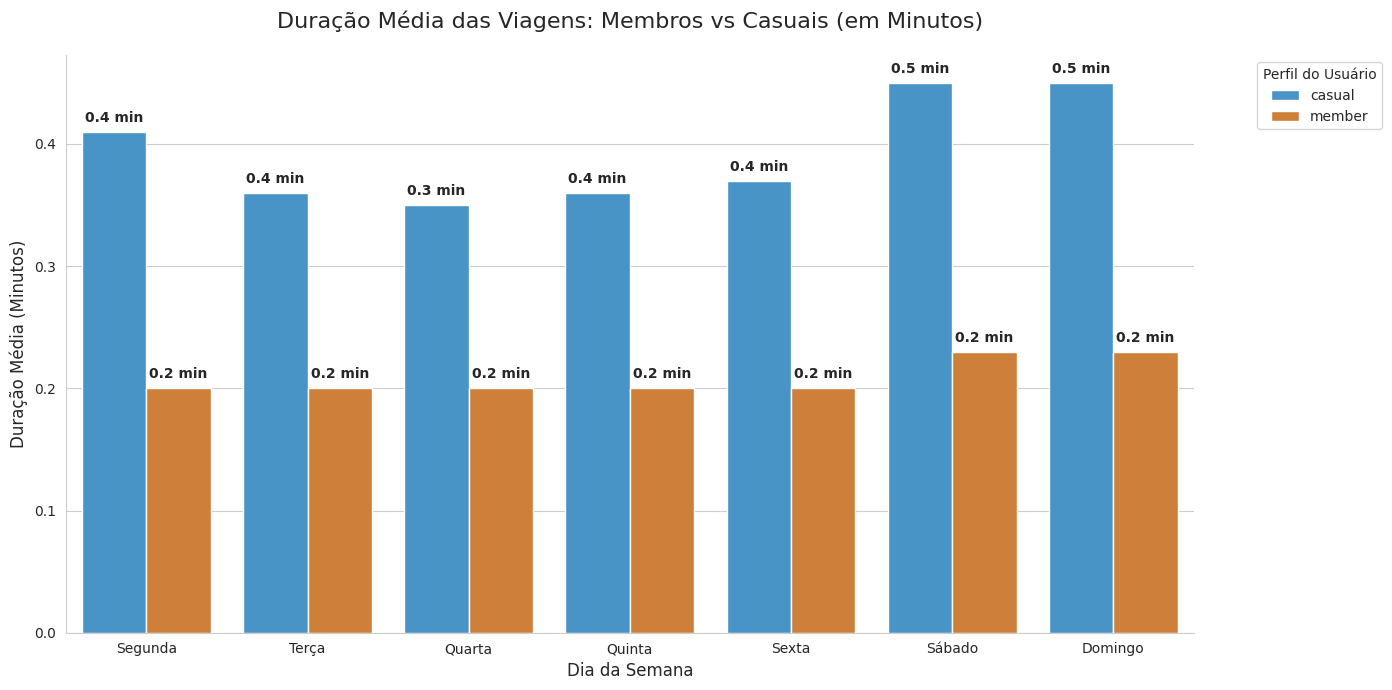

In [53]:
# Duracao das viagens durante a semana
# 1. Garantir a ordem dos dias em português
ordem_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# 2. Agrupar os dados calculando a MÉDIA da duração da viagem
# Note que estamos usando .mean() na coluna 'duracao_viagem' (ou 'ride_length')
analise_duracao = df_limpo.groupby(['tipo_usuario', 'dia_semana'])['duracao_viagem(min)'].mean().reset_index()

# 3. Converter a duração de segundos para minutos para facilitar a leitura
analise_duracao['duracao_minutos'] = (analise_duracao['duracao_viagem(min)'] / 60).round(2)

# 4. Criar o gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.barplot(data=analise_duracao, x='dia_semana', y='duracao_minutos',
                 hue='tipo_usuario', palette=['#3498db', '#e67e22'], order=ordem_pt)

# 5. Adicionar os valores exatos em minutos no topo das barras
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f} min',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold', xytext=(0, 5),
                    textcoords='offset points')

# 6. Títulos e Legendas
plt.title('Duração Média das Viagens: Membros vs Casuais (em Minutos)', fontsize=16, pad=20)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Duração Média (Minutos)', fontsize=12)
plt.legend(title='Perfil do Usuário', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()

Analise: Identificamos que ciclistas casuais realizam viagens com duração média significativamente superior à dos membros anuais (aproximadamente o dobro do tempo). Este padrão reforça que o uso casual está atrelado a atividades de lazer. Recomenda-se criar campanhas de marketing digital que destaquem o plano anual como uma alternativa mais econômica para trajetos de longa duração.

In [54]:
# Analise da coluna duracao da viagem
# Calcular o tempo médio da viagem
tempo_medio = df_limpo['duracao_viagem(min)'].mean()
print(f"Tempo médio de viagem: {tempo_medio:.2f} minutos")

# Encontrar a viagem mais longa
viagem_mais_longa = df_limpo['duracao_viagem(min)'].max()
dias = viagem_mais_longa / 1440 # 24 horas é equivalente a 1440 minutos
print(f"Viagem mais longa: {viagem_mais_longa:.2f} minutos")
print(f"Viagem mais longa em dias: {dias:.2f} dias") # calculando a viagem em dias para faciliar a visualizacao

# Encontrar a viagem mais curta
viagem_mais_curta = df_limpo['duracao_viagem(min)'].min()
print(f"Viagem mais curta: {viagem_mais_curta:.2f} minutos")

Tempo médio de viagem: 17.10 minutos
Viagem mais longa: 34354.07 minutos
Viagem mais longa em dias: 23.86 dias
Viagem mais curta: 0.02 minutos


Obs: vamos considerar viagem mais longa 24 dias

In [55]:
# analise estatistica da duracao viagem x tipo usuario

estatisticas_duracao_por_usuario = df_limpo.groupby('tipo_usuario')['duracao_viagem(min)'].describe()
print(estatisticas_duracao_por_usuario)

                  count       mean        std   min   25%    50%    75%  \
tipo_usuario                                                              
casual        1758047.0  23.994500  71.255153  0.02  7.88  13.85  25.85   
member        2611005.0  12.452382  19.025340  0.02  5.25   8.98  15.37   

                   max  
tipo_usuario            
casual        34354.07  
member         1493.23  


Analise Estatistica:
Usuários Casuais:

Contagem: 1,758,047 viagens casuais foram registradas.
media: A duração média das viagens casuais é de aproximadamente 24 minutos.

Desvio padrao: O desvio padrão de 71.26 minutos é bastante alto, indicando uma grande variabilidade na duração das viagens casuais. Isso sugere que os usuários casuais realizam tanto viagens curtas quanto viagens significativamente mais longas.

Minimo: A viagem mais curta registrada para usuários casuais foi de 0.02 minutos (praticamente instantânea).

25% das viagens casuais duraram 7.88 minutos ou menos.

50% A mediana da duração das viagens casuais é de 13.85 minutos. Isso significa que metade das viagens casuais duraram menos de 13.85 minutos e a outra metade durou mais.

A mediana (13.85) é consideravelmente menor que a média (23.99), o que sugere uma distribuição assimétrica com uma cauda longa para a direita (ou seja, muitas viagens de longa duração puxando a média para cima).

75% das viagens casuais duraram 25.85 minutos ou menos.
maximo: A viagem mais longa registrada para usuários casuais teve uma duração impressionante de 34,354.07 minutos (aproximadamente 23.99 dias). Esse valor extremo provavelmente representa um outlier que pode precisar ser investigado (erro de registro ou um uso muito incomum).
Membros Anuais:

Usuários anuais:

contagem: 2,611,005 viagens foram realizadas por membros anuais.

media: A duração média das viagens de membros anuais é de aproximadamente 12.45 minutos. Essa média é significativamente menor do que a dos usuários casuais.
desvio padrao: O desvio padrão de 19.03 minutos é menor do que o dos usuários casuais, indicando uma menor variabilidade na duração de suas viagens.

As viagens dos membros tendem a ser mais consistentes em termos de duração.
min: A viagem mais curta registrada para membros anuais também foi de 0.02 minutos.

25% das viagens de membros anuais duraram 5.25 minutos ou menos.

50% A mediana da duração das viagens de membros anuais é de 8.98 minutos.
Novamente, a mediana é menor que a média (12.45), sugerindo uma distribuição assimétrica, embora menos extrema do que a dos usuários casuais.
75% das viagens de membros anuais duraram 15.37 minutos ou menos.
maximo A viagem mais longa registrada para membros anuais teve uma duração de 1,493.23 minutos (aproximadamente 24.89 horas).

Embora longa, é consideravelmente menor do que o máximo dos usuários casuais.

/tmp/ipython-input-2388155907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='tipo_usuario', y='duracao_viagem(min)', data=duracao_media_por_usuario, palette=cores)


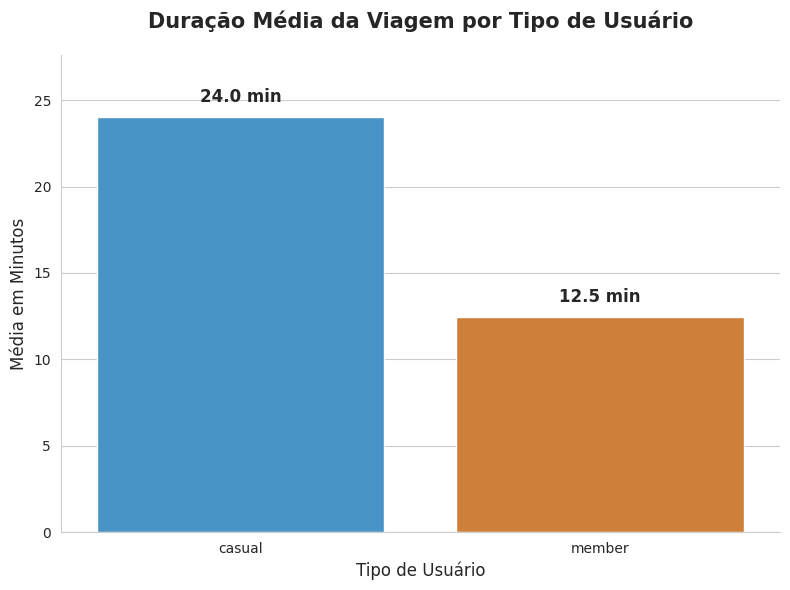

In [57]:
# plotando grafico de barras da duracao media das viagens
# 1. Preparação dos dados
duracao_media_por_usuario = df_limpo.groupby('tipo_usuario')['duracao_viagem(min)'].mean().reset_index()

# 2. Configuração do gráfico
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid") # Adiciona um fundo limpo com linhas de grade suaves

# 3. Criando o gráfico
# Definimos as cores exatas para manter a consistência com os gráficos anteriores
cores = ['#3498db', '#e67e22']
ax = sns.barplot(x='tipo_usuario', y='duracao_viagem(min)', data=duracao_media_por_usuario, palette=cores)

# 4. Adicionando os Rótulos (Labels) no topo das barras
for p in ax.patches:
    # Pegamos o valor da altura da barra (que é a média)
    valor_media = p.get_height()

    # Formatamos o texto: 1 casa decimal + ' min'
    texto = f'{valor_media:.1f} min'

    # Posicionamos o texto
    ax.annotate(texto,
                (p.get_x() + p.get_width() / 2., valor_media),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                xytext=(0, 8), # Pequeno deslocamento para cima
                textcoords='offset points')

# 5. Ajustes de Título e Eixos
plt.title('Duração Média da Viagem por Tipo de Usuário', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Tipo de Usuário', fontsize=12)
plt.ylabel('Média em Minutos', fontsize=12)

# Aumentamos um pouco o limite do eixo Y para o rótulo não ficar colado no topo
plt.ylim(0, duracao_media_por_usuario['duracao_viagem(min)'].max() * 1.15)

sns.despine() # Remove as bordas superior e direita
plt.tight_layout()
plt.show()

In [59]:
# Recarregando o df original limpo
df_limpo = pd.read_csv("dados_limpos_analise2.csv")
df_limpo.head()

,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min)
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Thursday,January,11,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Monday,January,8,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,Tuesday,January,4,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,Tuesday,January,0,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,Thursday,January,1,6.03


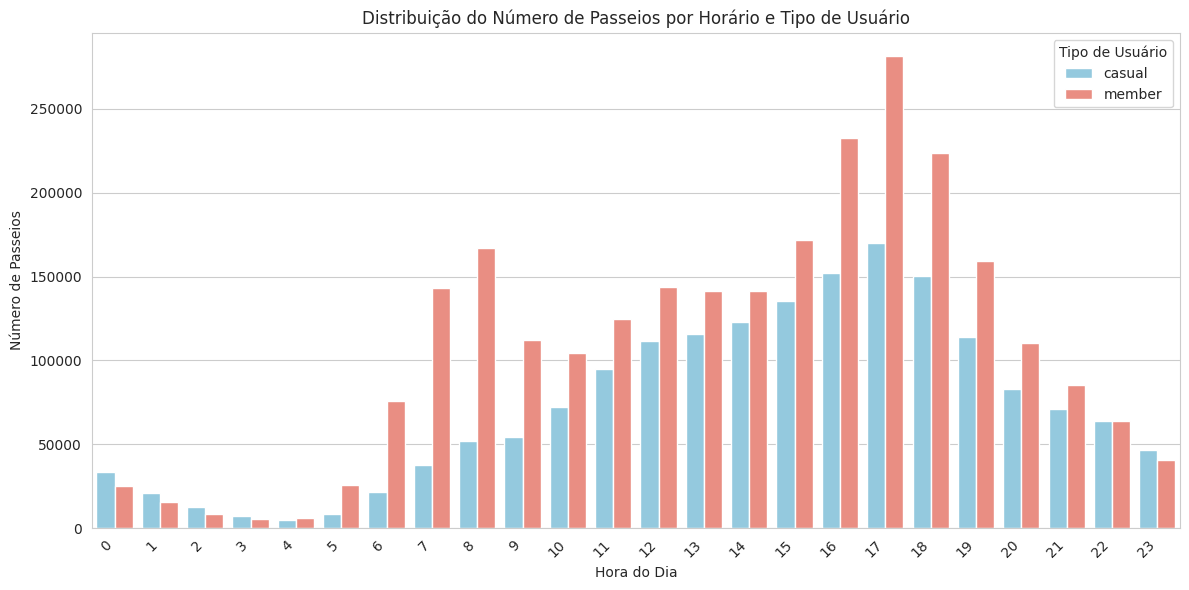

In [62]:
# Pltando grafico da distribuicao das viagens pelo horario
# Agrupa os dados por hora do dia e tipo de usuário, calcula o total de viagens
passeios_por_hora_e_tipo = df_limpo.groupby(['hora_saida', 'tipo_usuario'])['id_viagem'].count().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='hora_saida', y='id_viagem', hue='tipo_usuario', data=passeios_por_hora_e_tipo, palette={'casual': 'skyblue', 'member': 'salmon'})
plt.title('Distribuição do Número de Passeios por Horário e Tipo de Usuário')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Passeios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()

### Analise

A diferença proporcional de ciclistas casuais e membros começa a cair no início da noite, se iguala às 22 horas e segue a madrugada com proporções bem semelhantes até às 4 da manhã.

Após esse horário os membros superam os ciclistas sociais.
Os ciclistas fazem a maior parte dos passeios durante os horários de expediente e decrescem com a chegada da noite.

Esse dado corrobora com a hipótese de que os ciclistas casuais usam o aluguel de bicicletas para fins de lazer, enquanto os membros usam para irem ao trabalho.

Iremos Plotar um grafico analisando as viagens por estação, mas antes temos que inserir as informacoes no nosso df

As estações do ano nos EUA se dividem da seguinte forma:

Verão: de junho a agosto

Outono: de setembro a novembro

Inverno: de dezembro a fevereiro

Primavera: de março a maio.

fonte: https://www.ef.com.br/guia-destinos/estados-unidos/clima/

In [63]:
# Criando coluna estacao no nosso df
# Função para atribuir a estação do ano com base no mes
def atribuir_estacao(mes):
    if mes in ['June', 'July', 'August']:
        return 'verao'
    elif mes in ['September', 'October', 'November']:
        return 'outono'
    elif mes in ['December', 'January', 'February']:
        return 'inverno'
    else:
        return 'primavera'  # Os meses restantes são primavera

# Criar a nova coluna "estacao" usando a função apply
df_limpo['estacao'] = df_limpo['mes'].apply(atribuir_estacao)

# Verificar a nova coluna
print(df_limpo['estacao'].head())

0    inverno
1    inverno
2    inverno
3    inverno
4    inverno
Name: estacao, dtype: object


In [64]:
df_limpo.head()


,id_viagem,tipo_bicicleta,inicio_viagem,fim_viagem,estacao_inicio_nome,estacao_inicio_id,estacao_fim_nome,estacao_fim_id,tipo_usuario,dia_semana,mes,hora_saida,duracao_viagem(min),estacao
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Thursday,January,11,2.95,inverno
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,Monday,January,8,4.35,inverno
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,Tuesday,January,4,4.35,inverno
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,Tuesday,January,0,14.93,inverno
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,Thursday,January,1,6.03,inverno


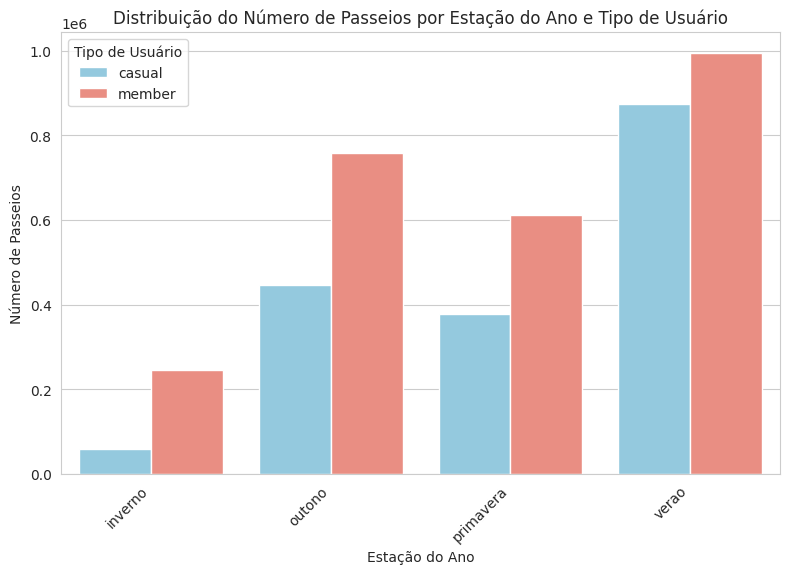

In [65]:
#Plotando grafico de viagem por estacao
# Agrupa os dados por estação do ano e tipo de usuário, calcula o total de viagens
passeios_por_estacao_e_tipo = df_limpo.groupby(['estacao', 'tipo_usuario'])['id_viagem'].count().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='estacao', y='id_viagem', hue='tipo_usuario', data=passeios_por_estacao_e_tipo, palette={'casual': 'skyblue', 'member': 'salmon'})
plt.title('Distribuição do Número de Passeios por Estação do Ano e Tipo de Usuário')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Passeios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()

### Analise

O número de ciclistas casuais caiu significativamente durante os meses de inverno (dezembro a fevereiro) para pouco mais de 2% do seu total.

O número de ciclistas casuais atinge o máximo nos meses de maio, junho, julho, agosto e setembro (fim da primavera, verão e início do outono), chegando a 74% do seu total.

# **Etapa 5 - Agir**



Conclusão e Rsposta das perguntas de mercado.

Tipo de Usuário:

Os membros anuais representam cerca de 60% dos usuários, enquanto os ciclistas casuais representam os 40% restantes.
Duração da Viagem:

Os ciclistas casuais tendem a fazer viagens mais longas em média (24 minutos) em comparação com os membros anuais (12 minutos).

Dia da Semana:

Os membros anuais usam as bicicletas principalmente durante a semana, enquanto os ciclistas casuais as utilizam mais nos finais de semana, especialmente aos sábados o que pode caracterizar o uso para o lazer.

Horário do Dia:

Os membros anuais demonstram um padrão de uso consistente ao longo do dia, com picos nos horários de deslocamento para o trabalho. Os ciclistas casuais, por outro lado, apresentam um pico de uso durante o dia, principalmente à tarde.

Estação do Ano:

Os ciclistas casuais usam as bicicletas com mais frequência durante os meses de primavera e verão, enquanto o uso diminui significativamente no inverno.

Tipo de Bicicleta:

A maioria dos usuários, tanto membros anuais quanto ciclistas casuais, preferem bicicletas clássicas ou elétricas. As bicicletas ancoradas são menos populares.

Visualizações

As visualizações geradas durante a análise, como gráficos de barras e dispersão, corroboram as observações acima e fornecem uma representação gráfica dos padrões de uso.

Respostas às Perguntas

1 - Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?

Os membros anuais usam as bicicletas principalmente para deslocamentos diários, como ir e voltar do trabalho, durante a semana e em viagens mais curtas. Os ciclistas casuais, por outro lado, usam as bicicletas para lazer, principalmente nos finais de semana e em viagens mais longas, com maior frequência durante os meses de primavera e verão.

2 - Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?

Os passageiros casuais podem querer adquirir planos anuais se perceberem que usam as bicicletas com frequência suficiente para que o plano anual seja mais econômico do que o pagamento por viagem. Além disso, um plano anual pode oferecer benefícios adicionais, como descontos ou acesso a outros serviços. A Cyclistic pode destacar esses benefícios em suas campanhas de marketing para atrair ciclistas casuais moradores da cidade.

3 - Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

A Cyclistic pode usar a mídia digital para segmentar os ciclistas casuais com anúncios personalizados que destaquem os benefícios de um plano anual, como economia de custos e conveniência. As campanhas podem ser direcionadas para usuários que fazem viagens frequentes, longas ou em horários específicos que indicam uso regular. A Cyclistic também pode usar as mídias sociais para compartilhar conteúdo relevante para ciclistas casuais, como dicas de segurança, rotas turisticas e eventos relacionados ao ciclismo. Oferecer promoções e descontos exclusivos para membros também pode ser uma estratégia eficaz para incentivar a conversão de ciclistas casuais para membros anuais.